In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import plotly.colors as pc

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report
print("All dependencies are imported.")

All dependencies are imported.


In [11]:
data = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(data)

In [12]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


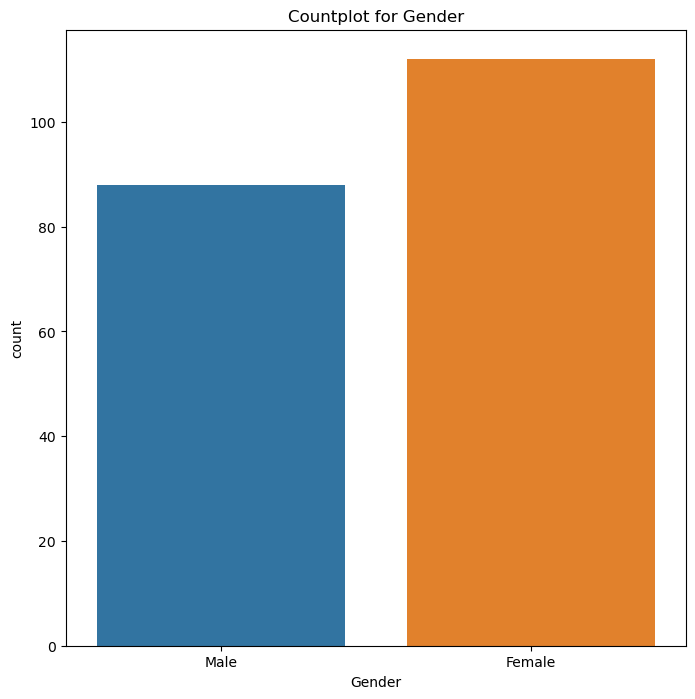

In [14]:
def plot_object_columns(df):
    # Get column names
    column_names = df.columns.to_list()

    # Create a list to store the column names having Object as Dtype
    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    # Iterate through the object columns and plot count plots
    for i, column_name in enumerate(object_list, 1):
        plt.figure(figsize=(8, 8))
        plt.subplot(len(object_list), 1, i)
        sns.countplot(x=df[column_name], data=df)
        plt.title(f'Countplot for {column_name}')
        plt.show()

# Example usage:
plot_object_columns(df)

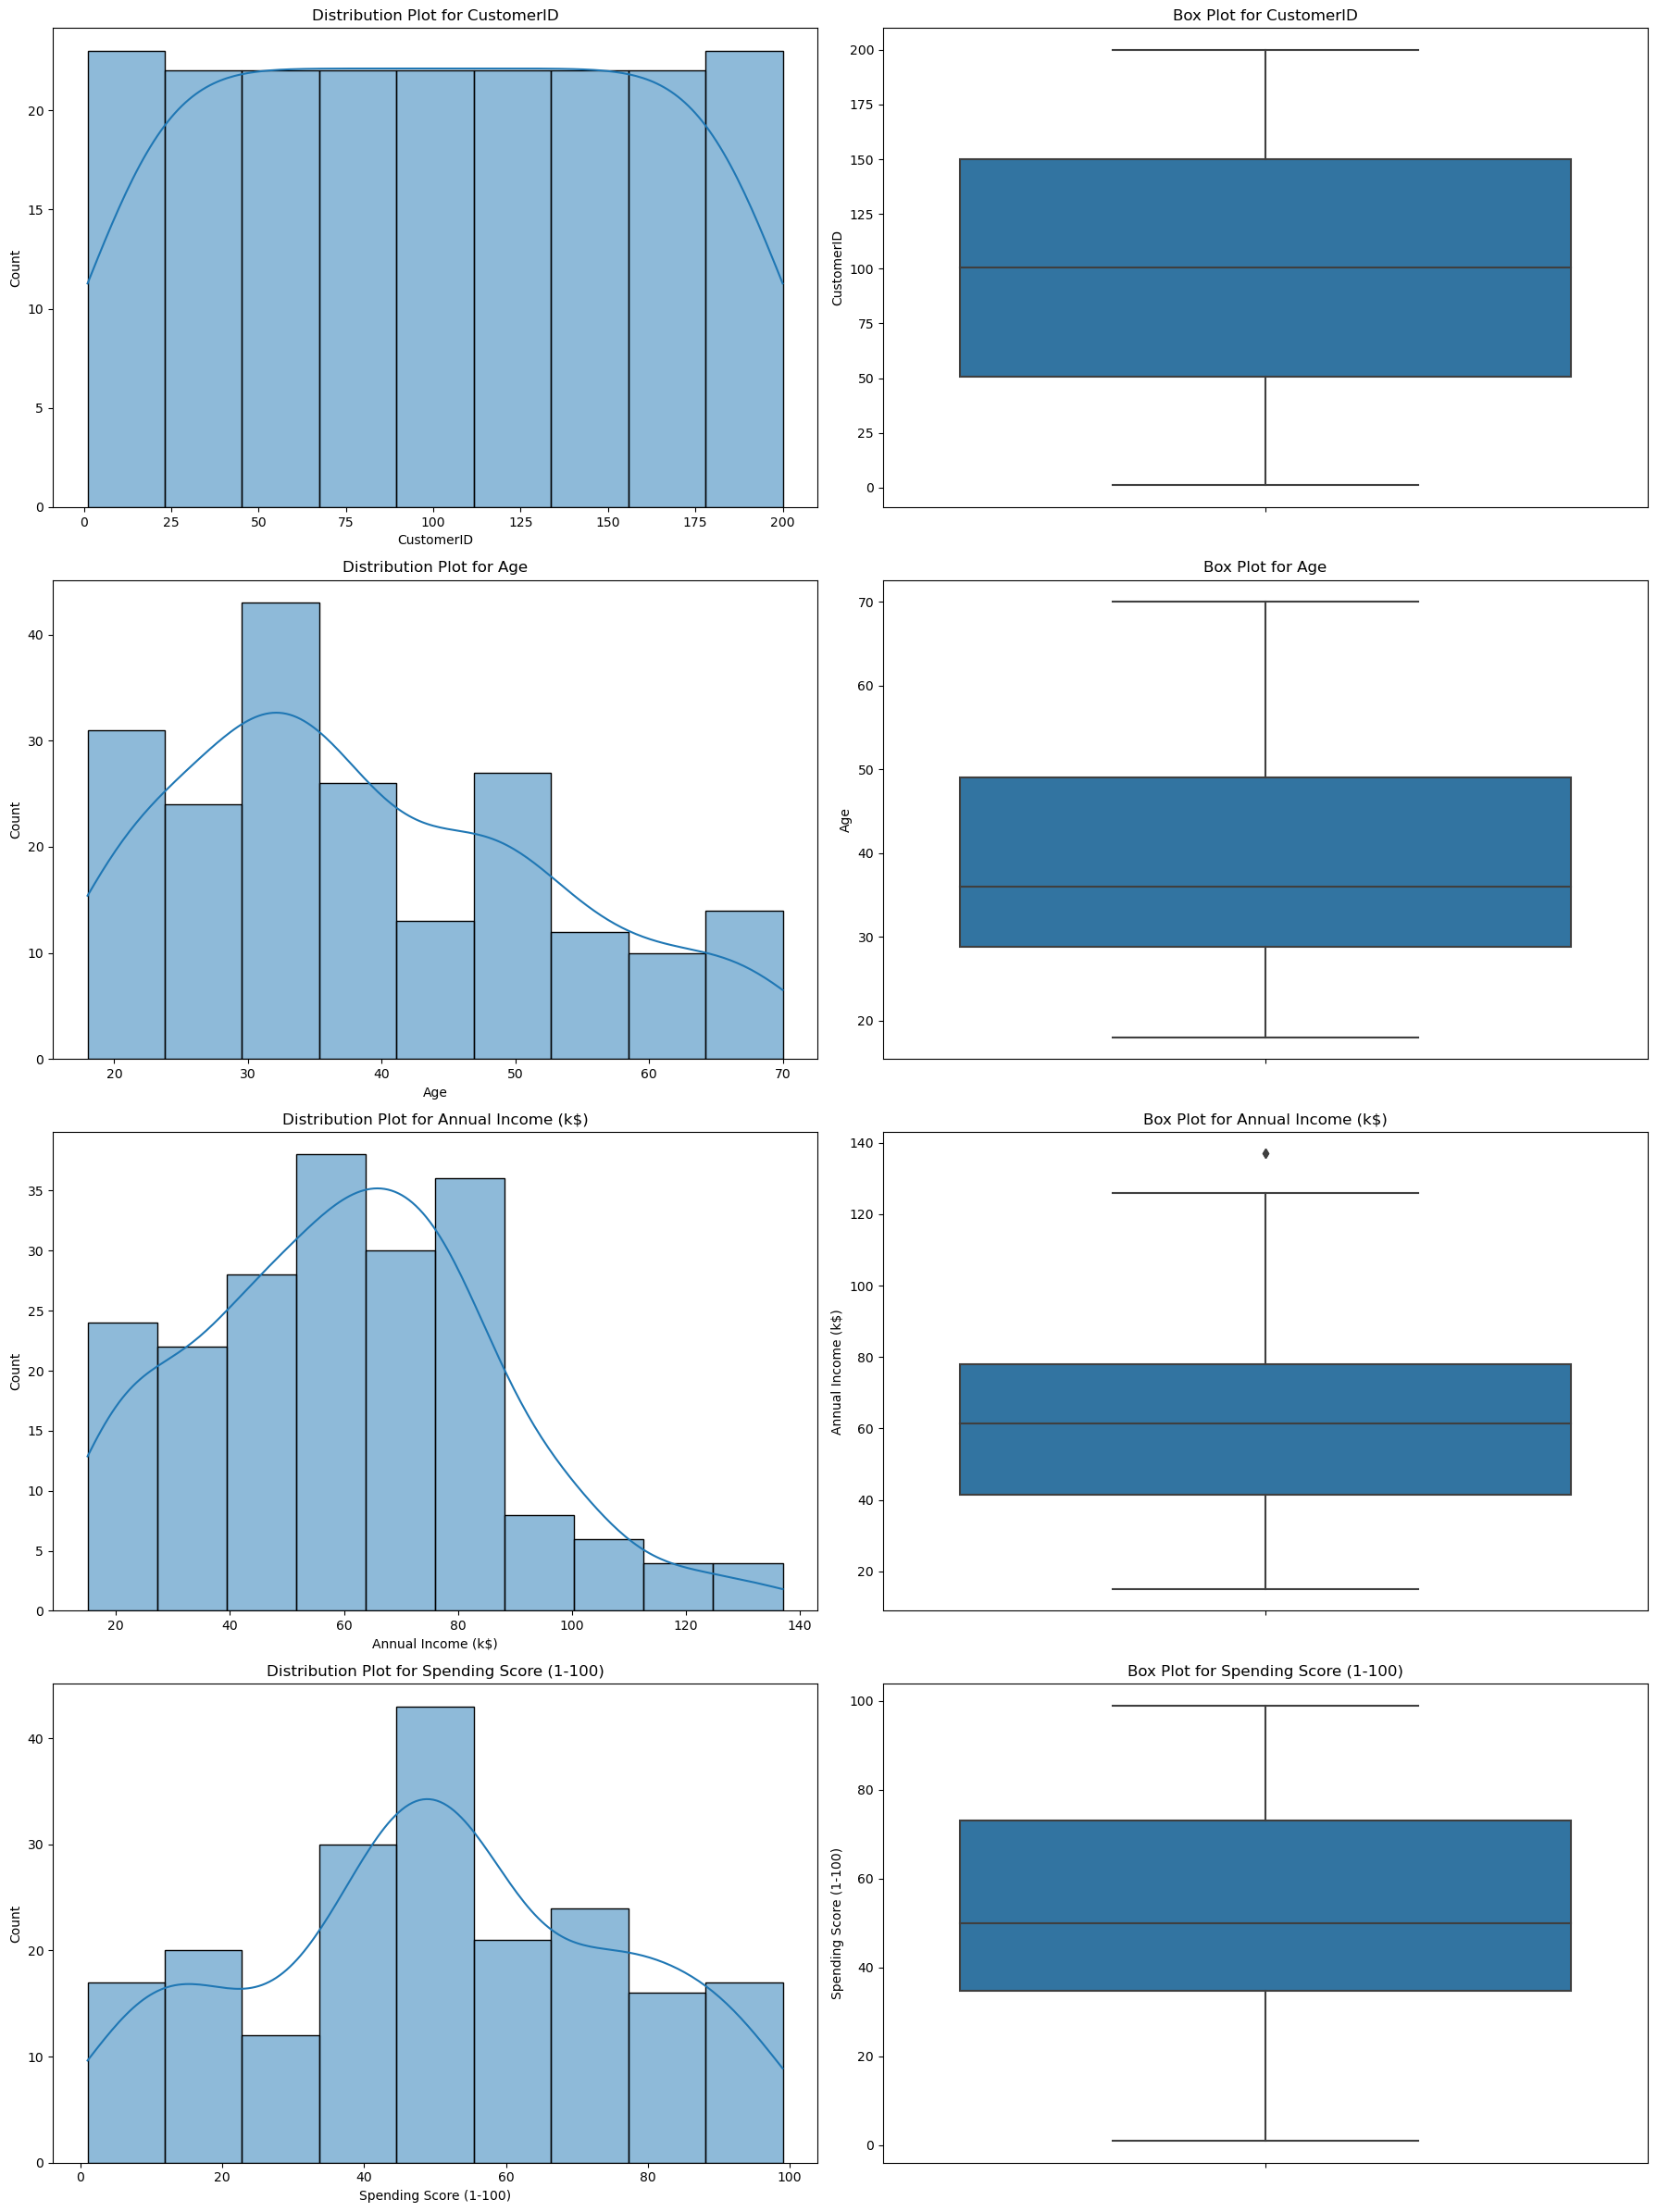

In [15]:
def plot_numerical_columns(df):
    # Get column names
    column_names = df.columns.to_list()
    
    numerical_list = [column_name for column_name in column_names if df[column_name].dtype in ['int64', 'float64']]
    object_list = [column_name for column_name in column_names if df[column_name].dtype == 'O']

    # Create a grid of subplots with 2 columns for each numerical column
    fig, axes = plt.subplots(nrows=len(numerical_list), ncols=2, figsize=(18, 6 * len(numerical_list)))

    # Plot histograms and box plots
    for i, column_name in enumerate(numerical_list):
        sns.histplot(df[column_name], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Distribution Plot for {column_name}')

        sns.boxplot(y=df[column_name], ax=axes[i, 1])
        axes[i, 1].set_title(f'Box Plot for {column_name}')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()
    
#     Return numerical_list and object_list
    return numerical_list, object_list

# Assuming you have a DataFrame named 'dataSet'
numerical_list,object_list = plot_numerical_columns(df)

In [17]:
# Create a histogram with gray bars
fig = px.histogram(
    data_frame=df,
    x="Age",
    nbins=20,
    title="Age Distribution",
    color_discrete_sequence=['#B3CDE3'] 
)

# Update layout
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white"
)

# Show the histogram
fig.show()

In [18]:
fig = px.histogram(df, x="Annual Income (k$)", nbins=20, title="Income Distribution")

# Customize the appearance with a green color
fig.update_traces(marker=dict(color='#66CDAA', opacity=0.7), selector=dict(type='histogram'))
fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Frequency",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
    showlegend=False  # To hide the legend
)

fig.show()

In [19]:
# Define a color scale from the color library
color_scale = pc.qualitative.Set3

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("KDE Plot", "Box Plot"))

# Create KDE Plot (left subplot)
kde_trace = go.Histogram(
    x=df['Spending Score (1-100)'],
    name="KDE",
    histnorm='probability density',
    marker=dict(color=color_scale[0]),
    opacity=0.7,
)
fig.add_trace(kde_trace, row=1, col=1)

# Create Box Plot (right subplot)
box_trace = go.Box(
    y=df['Spending Score (1-100)'],
    name="Box Plot",
    marker=dict(color=color_scale[3]),
)
fig.add_trace(box_trace, row=1, col=2)

# Update layout and labels
fig.update_layout(
    title="Spending Score Distribution (KDE and Box Plot)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the subplot
fig.show()

In [22]:
# Calculate the gender distribution as a percentage
gender_percentage = df['Gender'].value_counts(normalize=True) * 100

# Define a color scale from the color library
color_scale = px.colors.qualitative.Pastel1

# Convert percentage values to strings
percentage_text = gender_percentage.round(1).astype(str) + '%'

# Create a bar plot for the gender distribution as a percentage
fig = px.bar(
    x=gender_percentage.index,
    y=gender_percentage.values,
    color=gender_percentage.index,
    color_discrete_sequence=color_scale,
    text=percentage_text,  # Add percentage values as text
    labels={'x': 'Gender', 'y': 'Percentage (%)'},
    title="Gender Distribution as Percentage (Bar Plot)",
)
# Update layout and labels
fig.update_layout(
    title="Gender Distribution as Percentage",
    xaxis_title="Gender",
    yaxis_title="Percentage (%)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white"
)

# Make percentage_text bigger
fig.update_traces(textfont_size=16)  # Adjust the font size here

# Show the bar plot
fig.show()

In [25]:
summary_stats = df[['Annual Income (k$)', 'Spending Score (1-100)']].describe().reset_index()

# Create a table to display summary statistics
fig = go.Figure(data=[go.Table(
    header=dict(values=['Statistic', 'Annual Income (k$)', 'Spending Score (1-100)'],
                fill=dict(color='#C2D4FF'),
                align=['left', 'center'],
                font=dict(size=14)),
    cells=dict(values=[summary_stats['index'], summary_stats['Annual Income (k$)'], summary_stats['Spending Score (1-100)']],
               fill=dict(color=['#F5F8FF', '#FAEBD7']),
               align=['left', 'center'],
               font=dict(size=12))
)])

# Update table layout
fig.update_layout(
    title="Summary Statistics",
    font=dict(size=14, color="black"),
    margin=dict(l=20, r=20, t=50, b=10),
    paper_bgcolor="#F0F0F0",  # Background color
)

# Show the bar plot
fig.show()

### <center> Bivariate Analysis:</center>
- <b>Pairwise Relationships:</b> Create a pair plot (scatter matrix) to visualize pairwise relationships between all numeric variables (age, income, spending score).

- <b> Gender vs. Spending Score:</b> Create a bar chart or box plot to compare the spending scores of male and female customers.

- <b> Age vs. Spending Score:</b> Create a scatter plot with age on the x-axis and spending score on the y-axis to examine how age relates to spending.

- <b> Income vs. Age:</b> Create a scatter plot with annual income on the x-axis and age on the y-axis to see if there is a correlation between income and age.

- <b> Income vs. Spending Score:</b> Create a scatter plot with annual income on the x-axis and spending score on the y-axis to explore the relationship between income and spending.

- <b> Income by Gender:</b> Create a box plot or violin plot to compare the distribution of annual incomes between male and female customers.

- <b> Age Group Analysis:</b> Create a bar chart or box plot to analyze how spending scores vary across different age groups (e.g., young adults, middle-aged, and senior citizens)

In [31]:
# Create a custom color scale
custom_color_scale = px.colors.qualitative.Dark24

# Create a pair plot using Plotly Express with the custom color scale
fig = px.scatter_matrix(
    df,
    dimensions=["Annual Income (k$)", "Spending Score (1-100)", "Age"],
    color="Gender",
    title="Pair Plot of Annual Income, Spending Score, and Age",
    symbol="Gender",
    labels={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending Score"},
    color_discrete_map={category: color for category, color in zip(df['Gender'].unique(), custom_color_scale)}
)

# Update the layout
fig.update_layout(
    title_x=0.5,  # Center the title
    showlegend=True,  # Show legend
)

# Show the pair plot
fig.show()

In [30]:
# Define a color scale ("Dark24") from the Plotly Express color library
color_scale = px.colors.qualitative.Dark24

# Create a box plot for Spending Score by Gender
fig = px.box(
    df,
    x="Gender",
    y="Spending Score (1-100)",
    title="Spending Score Distribution by Gender",
    color="Gender",
    color_discrete_sequence=color_scale,
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Spending Score (1-100)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the box plot
fig.show()

In [34]:
fig = px.scatter(
    df,
    x="Age",
    y="Spending Score (1-100)",
    title="Age vs. Spending Score with Fit Line",
    color=df['Gender'],
    hover_name="Age",  # Show age in hover tooltip
    trendline="ols",  # Add an ordinary least squares (OLS) regression fit line
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Spending Score (1-100)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the scatter plot with the fit line
fig.show()

In [36]:
# Create a scatter plot for Income vs. Age with a fit line
fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Age",
    title="Income vs. Age with Fit Line",
    color=df['Gender'],
    hover_name="Age",  # Show age in hover tooltip
    trendline="ols",  # Add an ordinary least squares (OLS) regression fit line
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Age",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)
# Show the scatter plot with the fit line
fig.show()

In [38]:
# Define a color scale ("Viridis") from the color library
color_scale = pc.sequential.Viridis

# Create a scatter plot for Income vs. Spending Score with size based on Age
fig = px.scatter(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    title="Income vs. Spending Score",
    color=df['Gender'],
    color_continuous_scale=color_scale,
    size="Age",
    hover_name="Age",  # Show age in hover tooltip
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Spending Score (1-100)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the scatter plot
fig.show()

In [40]:
# Define a color scale ("Dark24") from the Plotly Express color library
color_scale =  px.colors.qualitative.Dark24

# Create a bar plot for Income by Gender
fig = px.bar(
    df,
    x="Gender",
    y="Annual Income (k$)",
    title="Income by Gender",
    color="Gender",
    color_discrete_sequence=color_scale,
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Annual Income (k$)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the bar plot
fig.show()

In [42]:
# Define age group bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61+"]

# Create a new column 'Age Group' based on age bins and labels
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age group and count the number of customers in each group
age_group_counts = df['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Create a bar plot for age group analysis
fig = px.bar(
    age_group_counts,
    x='Age Group',
    y='Count',
    title='Age Group Analysis',
    labels={'Count': 'Number of Customers'},
    color_discrete_sequence=["#66B2FF"],  # Customize the color
)

# Customize the appearance
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Customers',
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the bar plot
fig.show()

## <center> K-means Clustring </center>
Why K-means clustering for this dataset?

In this scenario we will attempt to find groups which have not been explicitly labeled in the data.

Choose the number of K clusters
Select random centroids
Assign each data point the closest centroid
Compute and place the new centroid of each cluster
Reassign the data points to the new closest k centroid till no more reassignment

In [43]:
X = df.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

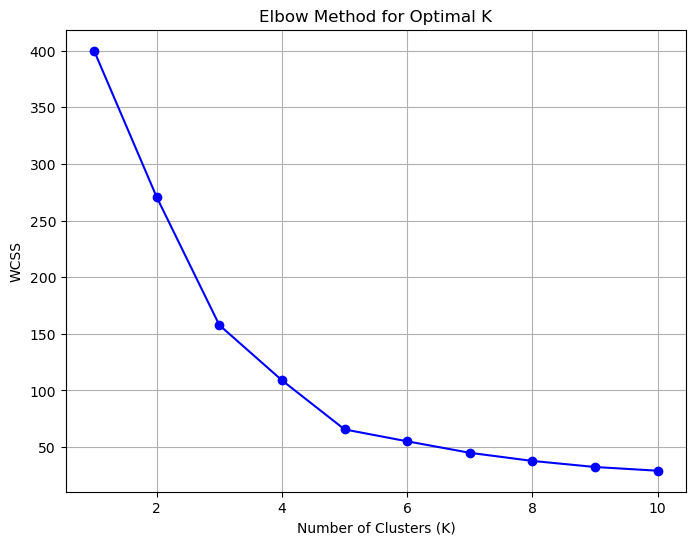

In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to cluster (Annual Income and Spending Score)
X = df.iloc[:, [3, 4]].values

# Standardize the data (recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize a list to store the WCSS values
wcss = []

# Try different values of K (from 1 to 10) and calculate WCSS for each K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X)

In [46]:
# Create a trace for each cluster
cluster_traces = []
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    cluster_trace = go.Scatter(
        x=X[y_kmeans == i, 0],
        y=X[y_kmeans == i, 1],
        mode='markers',
        marker=dict(size=10, color=colors[i]),
        name=f'Cluster {i + 1}'
    )
    cluster_traces.append(cluster_trace)

# Create a trace for centroids
centroid_trace = go.Scatter(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    mode='markers',
    marker=dict(size=12, color='yellow', symbol='cross'),
    name='Centroids'
)

# Create the layout
layout = go.Layout(
    title='Clusters of Customers',
    xaxis=dict(title='Annual Income (k$)'),
    yaxis=dict(title='Spending Score (1-100)'),
    legend=dict(x=0.7, y=0.95),
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Create the figure
fig = go.Figure(data=cluster_traces + [centroid_trace], layout=layout)

# Show the Plotly graph
fig.show()

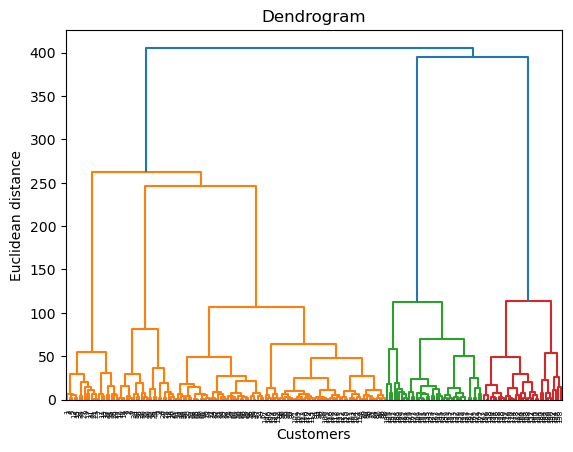

In [48]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

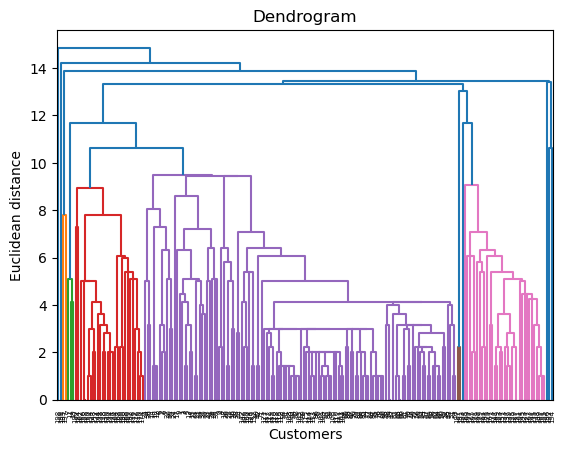

In [49]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

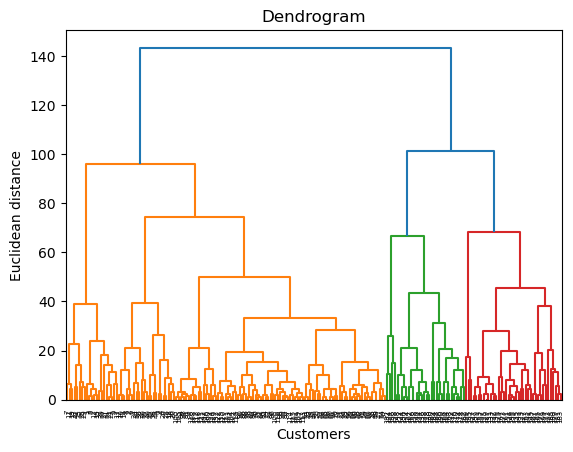

In [50]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

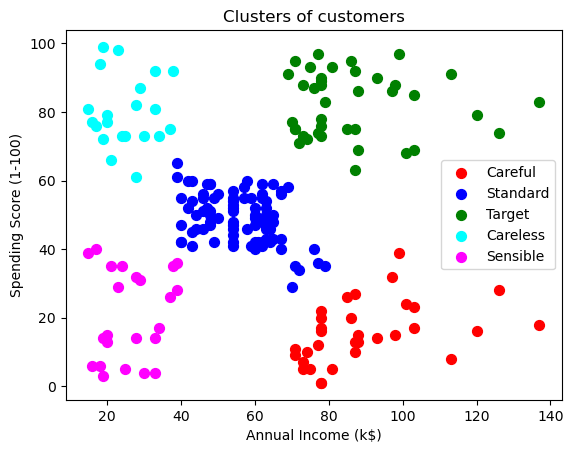

In [51]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

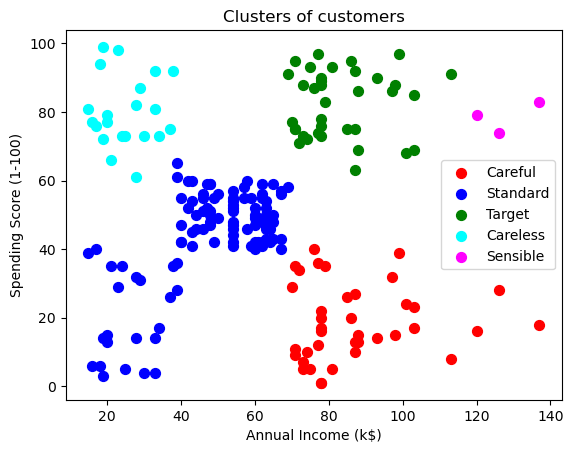

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

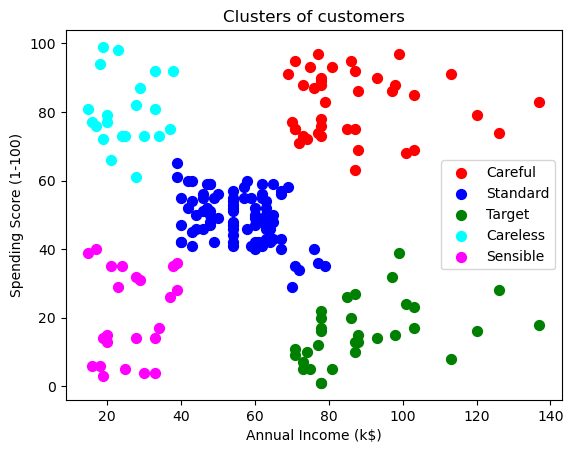

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

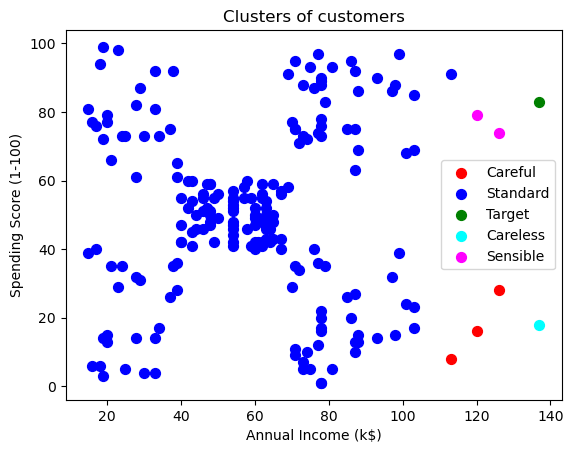

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()